In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
#loading the dataset

In [12]:
file_path = "cardioActivities.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      508 non-null    datetime64[ns]
 1   Activity Id               508 non-null    object        
 2   Type                      508 non-null    object        
 3   Route Name                1 non-null      object        
 4   Distance (km)             508 non-null    float64       
 5   Duration                  508 non-null    object        
 6   Average Pace              508 non-null    object        
 7   Average Speed (km/h)      508 non-null    float64       
 8   Calories Burned           508 non-null    float64       
 9   Climb (m)                 508 non-null    int64         
 10  Average Heart Rate (bpm)  294 non-null    float64       
 11  Friend's Tagged           0 non-null      float64       
 12  Notes                 

In [14]:
print(df.head())

                 Date                           Activity Id     Type  \
0 2018-11-11 14:05:12  c9627fed-14ac-47a2-bed3-2a2630c63c15  Running   
1 2018-11-09 15:02:35  be65818d-a801-4847-a43b-2acdf4dc70e7  Running   
2 2018-11-04 16:05:00  c09b2f92-f855-497c-b624-c196b3ef036c  Running   
3 2018-11-01 14:03:58  bc9b612d-3499-43ff-b82a-9b17b71b8a36  Running   
4 2018-10-27 17:01:36  972567b2-1b0e-437c-9e82-fef8078d6438  Running   

  Route Name  Distance (km) Duration Average Pace  Average Speed (km/h)  \
0        NaN          10.44    58:40         5:37                 10.68   
1        NaN          12.84  1:14:12         5:47                 10.39   
2        NaN          13.01  1:15:16         5:47                 10.37   
3        NaN          12.98  1:14:25         5:44                 10.47   
4        NaN          13.02  1:12:50         5:36                 10.73   

   Calories Burned  Climb (m)  Average Heart Rate (bpm)  Friend's Tagged  \
0            774.0        130           

In [15]:
print(df.describe())

       Distance (km)  Average Speed (km/h)  Calories Burned  Climb (m)  \
count     508.000000            508.000000     5.080000e+02  508.00000   
mean       11.757835             11.341654     1.878197e+04  128.00000   
std         6.209219              2.510516     2.186930e+05  108.52604   
min         0.760000              1.040000     4.000000e+01    0.00000   
25%         7.015000             10.470000     4.917500e+02   53.00000   
50%        11.460000             11.030000     7.280884e+02   92.00000   
75%        13.642500             11.642500     9.212500e+02  172.25000   
max        49.180000             24.330000     4.072685e+06  982.00000   

       Average Heart Rate (bpm)  Friend's Tagged  
count                294.000000              0.0  
mean                 143.530612              NaN  
std                   10.583848              NaN  
min                   77.000000              NaN  
25%                  140.000000              NaN  
50%                  144.00

In [16]:
df.isnull().sum()

Date                          0
Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

In [17]:
df = df.drop(columns=['Route Name', 'Friend\'s Tagged'])

In [18]:
mean_heart_rate = df['Average Heart Rate (bpm)'].mean()
df['Average Heart Rate (bpm)'].fillna(mean_heart_rate, inplace=True)


In [19]:
df.isnull().sum()

Date                          0
Activity Id                   0
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)      0
Notes                       277
GPX File                      4
dtype: int64

In [20]:
print(df['Type'].unique())

['Running' 'Cycling' 'Other' 'Walking']


In [21]:
#EDA

In [22]:
df.head()

,Date,Activity Id,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,2018-10-27-170136.gpx


In [23]:
df.shape

(508, 12)

In [24]:
correlation_matrix = df.corr()
print(correlation_matrix)

                          Distance (km)  Average Speed (km/h)  \
Distance (km)                  1.000000              0.466094   
Average Speed (km/h)           0.466094              1.000000   
Calories Burned               -0.104799             -0.054309   
Climb (m)                      0.800114              0.222888   
Average Heart Rate (bpm)      -0.119129             -0.200370   

                          Calories Burned  Climb (m)  Average Heart Rate (bpm)  
Distance (km)                   -0.104799   0.800114                 -0.119129  
Average Speed (km/h)            -0.054309   0.222888                 -0.200370  
Calories Burned                  1.000000  -0.079937                  0.000098  
Climb (m)                       -0.079937   1.000000                 -0.061811  
Average Heart Rate (bpm)         0.000098  -0.061811                  1.000000  


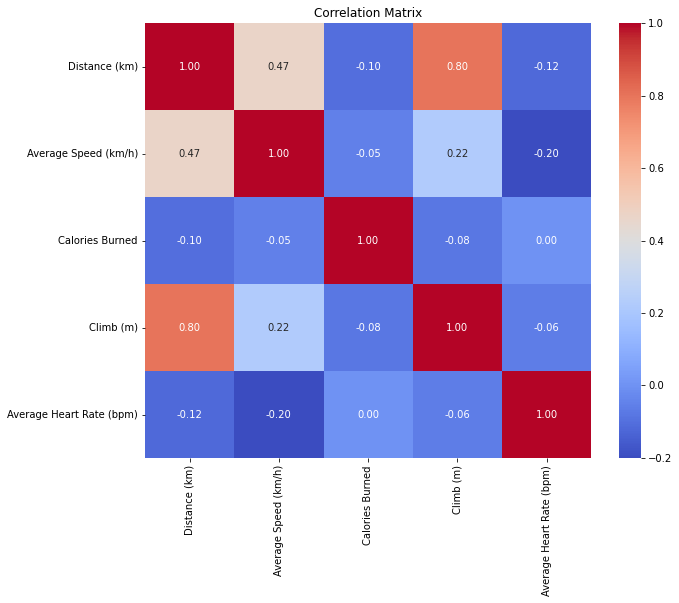

In [25]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [26]:
# Strong Positive Correlations:
# Distance and Climb: This indicates that activities covering longer distances tend to involve more elevation gain. This makes sense, as longer routes often traverse more varied terrain.

# Moderate Positive Correlation:
# Distance and Average Speed: This suggests that faster activities often cover greater distances within a given time frame.


# Weak Correlations:
# Calories Burned and other metrics: The correlations between calories burned and distance, speed, climb, and heart rate are relatively weak. This implies that calorie expenditure is influenced by multiple factors beyond these individual metrics.

# Key Points:
# Distance and Climb: These metrics are strongly linked, suggesting that longer activities typically involve more elevation gain.
# Average Speed and Distance: These metrics are moderately correlated, indicating that faster activities often cover greater distances.
# Calories Burned: The weak correlations with other metrics suggest that calorie expenditure is influenced by a complex interplay of factors.

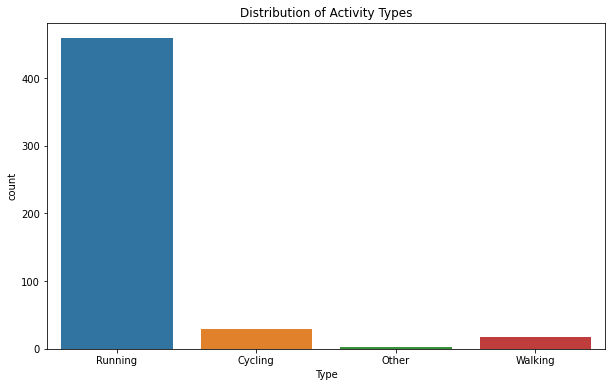

In [27]:
# Countplot for different activity types
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Activity Types')
plt.show()


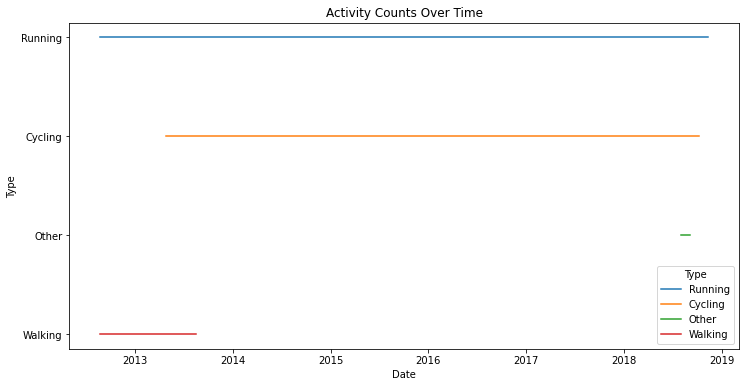

In [28]:
# Extracting year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Line plot for activity counts over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Type', data=df, estimator='count', hue='Type')
plt.title('Activity Counts Over Time')
plt.show()


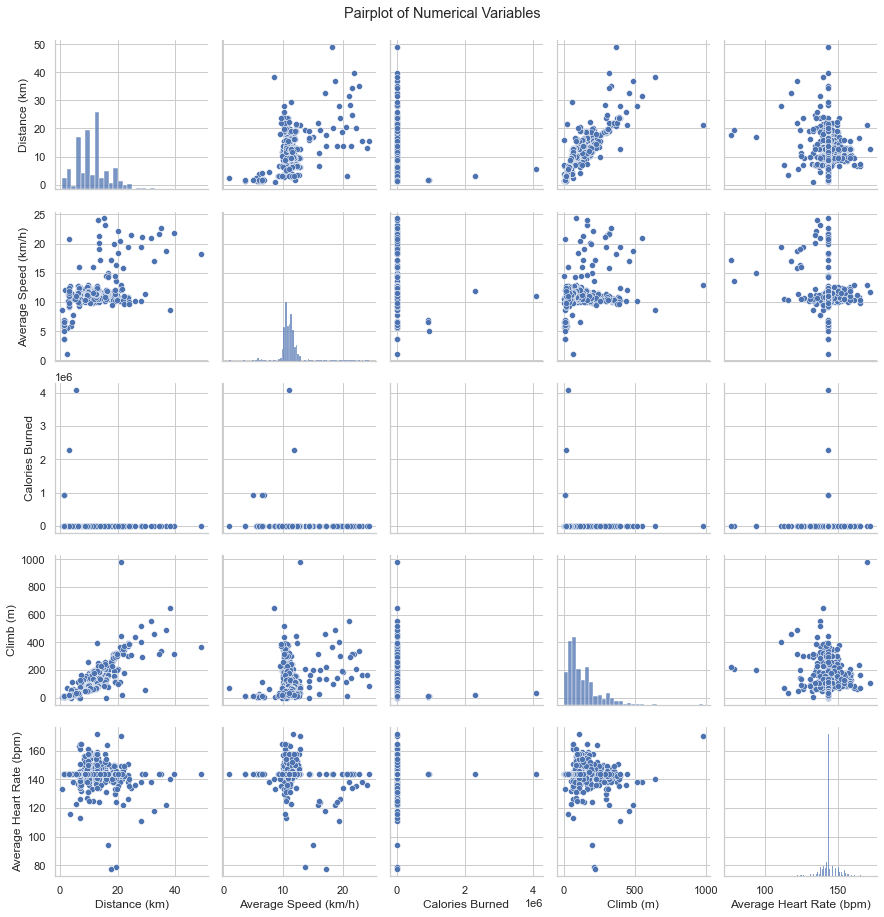

In [30]:
# Pairplot for numerical variables
sns.pairplot(df[['Distance (km)', 'Duration', 'Average Speed (km/h)', 'Calories Burned', 'Climb (m)', 'Average Heart Rate (bpm)']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


In [31]:
correlation_matrix = df.corr()
print(correlation_matrix)


                          Distance (km)  Average Speed (km/h)  \
Distance (km)                  1.000000              0.466094   
Average Speed (km/h)           0.466094              1.000000   
Calories Burned               -0.104799             -0.054309   
Climb (m)                      0.800114              0.222888   
Average Heart Rate (bpm)      -0.119129             -0.200370   
Year                           0.428912              0.107909   
Month                          0.018155              0.035211   

                          Calories Burned  Climb (m)  \
Distance (km)                   -0.104799   0.800114   
Average Speed (km/h)            -0.054309   0.222888   
Calories Burned                  1.000000  -0.079937   
Climb (m)                       -0.079937   1.000000   
Average Heart Rate (bpm)         0.000098  -0.061811   
Year                            -0.148675   0.523943   
Month                            0.037656   0.029973   

                          Aver

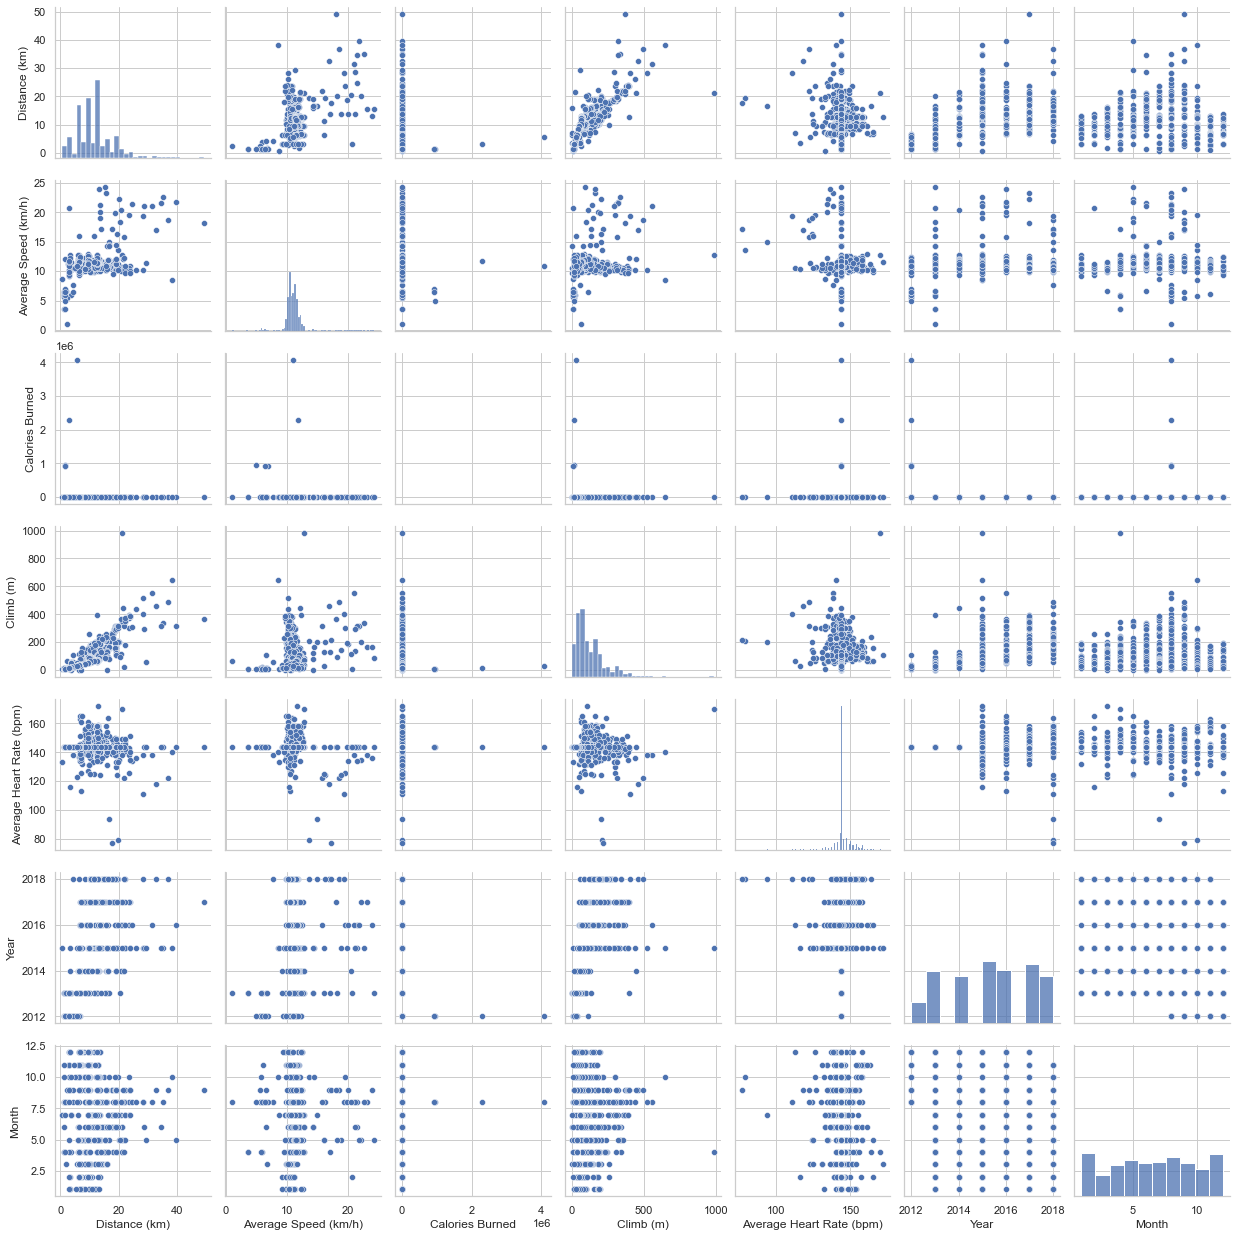

In [32]:
sns.pairplot(df)
plt.show()


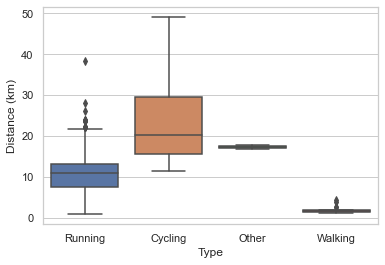

In [33]:
sns.boxplot(x='Type', y='Distance (km)', data=df)
plt.show()


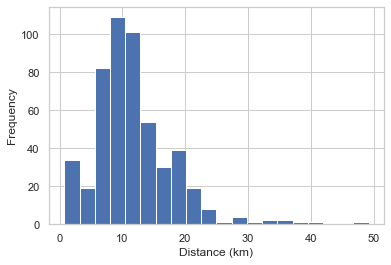

In [34]:
# Example: Use the correct column name with parentheses and spaces
df['Distance (km)'].hist(bins=20)
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()


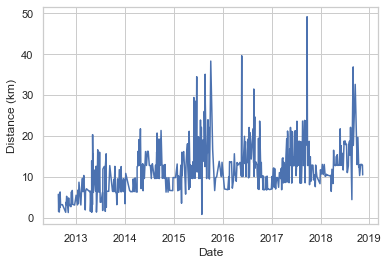

In [35]:
plt.plot(df['Date'], df['Distance (km)'])
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.show()



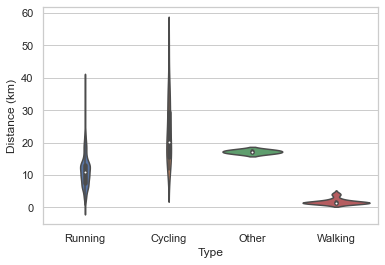

In [36]:
sns.violinplot(x='Type', y='Distance (km)', data=df)
plt.show()

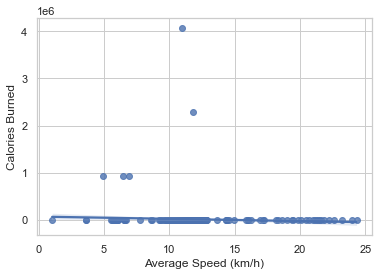

In [37]:
sns.regplot(x='Average Speed (km/h)', y='Calories Burned', data=df)
plt.show()

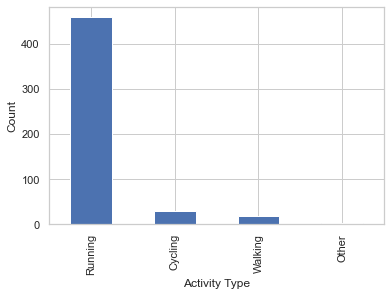

In [38]:
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()
